In [4]:
#!pip install imblearn

In [13]:
import pandas as pd
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
data = pd.read_csv(r'D:\GIT\Workshop Machine Learning\Datasets\Bank_Imbalance.csv')
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,1
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,1
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,1
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
data['y'].value_counts().values/len(data['y'])*100

array([79.89329777, 20.10670223])

In [15]:
x = data.iloc[:,:7]
y = data.iloc[:,7]

In [23]:
y.value_counts()

1    2396
0     603
Name: y, dtype: int64

In [16]:
smt = SMOTE()

In [17]:
x_sm,y_sm = smt.fit_resample(x,y)

In [19]:
y_sm.value_counts()

1    2396
0    2396
Name: y, dtype: int64

In [20]:
ada = ADASYN()

In [21]:
x_ad,y_ad = ada.fit_resample(x,y)

In [22]:
y_ad.value_counts()

0    2402
1    2396
Name: y, dtype: int64

# K-NN

In [69]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv(r'D:\GIT\Workshop Machine Learning\Datasets\Bank.csv')
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [30]:
X = data.iloc[:,:7]
y = data.iloc[:,7]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
knncl = KNeighborsClassifier(n_neighbors=10)

In [36]:
knncl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_pred = knncl.predict(x_test)

In [38]:
accuracy_score(y_pred,y_test)

0.9041029376062151

In [44]:
confusion_matrix(y_pred,y_test)

array([[7075,  540],
       [ 250,  373]], dtype=int64)

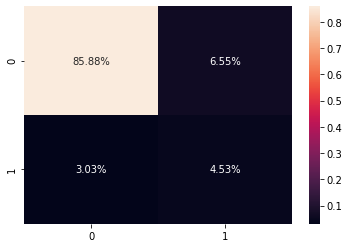

In [48]:
import seaborn as sns
import numpy as np
sns.heatmap(confusion_matrix(y_pred,y_test)/np.sum(confusion_matrix(y_pred,y_test)),annot=True,fmt='.2%')
plt.show()

In [51]:
df1 = pd.read_csv(r'D:\GIT\Workshop Machine Learning\Datasets\Boston.csv')
df1.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [52]:
X=df1.iloc[:,:12].values
y=df1.iloc[:,12].values

In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
knnr =KNeighborsRegressor(n_neighbors=10)

In [56]:
knnr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [57]:
y_pred=knnr.predict(x_test)

In [59]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.273563033655987

# optinal K

In [75]:
xtr,xts,ytr,yts = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [63]:
K = range(1,21)
error = []
for k in K:
    oknnr = KNeighborsRegressor(n_neighbors=k)
    oknnr.fit(xtr,ytr)
    ypr = oknnr.predict(xts)
    error.append(np.sqrt(mean_squared_error(ypr,yts)))


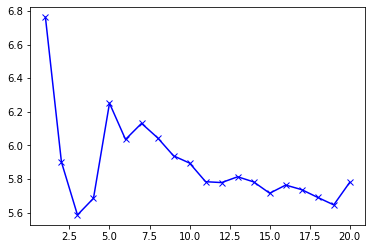

In [64]:
plt.plot(K,error,'bx-')
plt.show()

In [65]:
knnr = KNeighborsRegressor(n_neighbors=3)

In [66]:
knnr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [67]:
y_pred = knnr.predict(x_test)

In [68]:
np.sqrt(mean_squared_error(y_pred,y_test))

5.794817758483048

# using cross valitation

In [85]:
K = range(1,21)
error = []
for k in K:
    model = KNeighborsRegressor(n_neighbors=k)
    cvals = cross_val_score(model,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    #error.append(np.sqrt(cvals).mean())

C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


nan
nan
nan
nan


C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


nan
nan
nan
nan


C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


nan
nan
nan
nan
nan


C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


nan
nan
nan
nan
nan
nan
nan


C:\Users\uer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
